<a href="https://colab.research.google.com/github/e-liw/szkolenie_python/blob/main/Zalando_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#zbiór z zalando z obrazami
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#opis kategorii
class_names = ['T-shirt/top', 'Traousers', 'Pullover','Dress','Coat', 'Sandals','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
#kształt danych, liczba i obszar
train_images.shape

(60000, 28, 28)

In [6]:
#liczba etykiet
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
len(test_labels)

10000

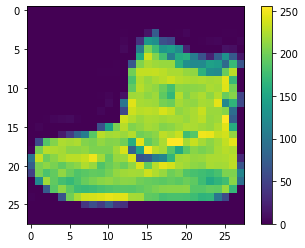

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#przeskalowanie
train_images = train_images/255.0
test_images = test_images/255.0


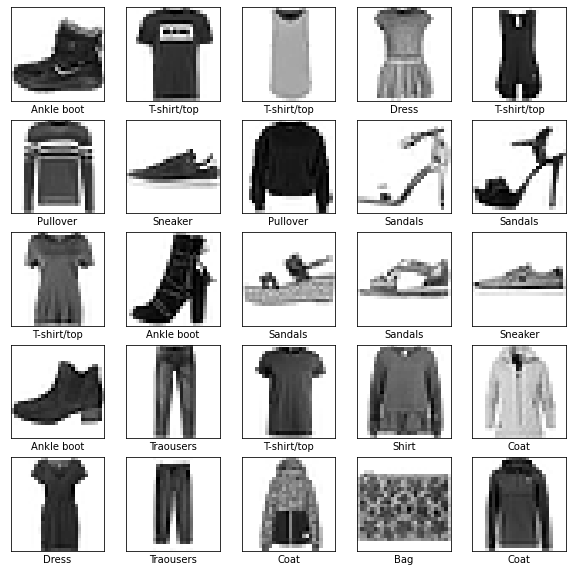

In [11]:
#25 pierwszych
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()



In [13]:
#budujemy model, sieć neuronową
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(10)
])
#kompilacja
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #funkcja straty
              metrics=['accuracy']) #metryka

In [14]:
#trenowanie
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3342 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2781 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2673 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2541 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest dokładności: {test_acc}")

313/313 - 0s - loss: 0.3232 - accuracy: 0.8867 - 466ms/epoch - 1ms/step

Test dokładności: 0.8866999745368958


In [17]:
#prognoza
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [18]:
predictions
 #każdy nawias kwadratowy to jeden obraz, czyli 10000 obrazów, a prawdopodobieństwa przypisane do naszych kategorii,
 # czyli w kwadratowym nawiasie jest kolejno prawdopodobieństwo czy to Tshirt, czy Spodnie.... 
 #Do jednego obrazu jest jedno prawdopodobieństwo bliskie 1, czyli, że to ta kategoria, pierwszy obraz ma jedynkę na ostatniej kategorii, więc to kozak :)

array([[1.21736889e-06, 2.75367938e-06, 7.37587840e-08, ...,
        4.76528369e-02, 5.67728421e-07, 9.47142720e-01],
       [5.17297362e-04, 1.12943876e-10, 9.95348275e-01, ...,
        2.29629927e-13, 8.78922379e-10, 5.12518522e-13],
       [2.65267488e-08, 1.00000000e+00, 3.81580856e-09, ...,
        7.07672866e-19, 1.63955599e-10, 2.17332137e-15],
       ...,
       [9.70993369e-07, 2.71847562e-11, 2.12496118e-07, ...,
        9.09696797e-12, 9.99958634e-01, 1.24373776e-15],
       [2.42841196e-08, 9.99996424e-01, 8.57252117e-11, ...,
        2.91541162e-12, 8.69560646e-10, 2.49214094e-10],
       [1.02067634e-06, 3.76971094e-08, 1.47805658e-05, ...,
        1.80331219e-04, 1.87542591e-05, 2.46687762e-07]], dtype=float32)

In [40]:
np.argmax(predictions[0]) # wyświetla najwyższą wartość z listy, czyli dla pierwszego obrazu mamy kategorię 9
print(np.argmax(predictions[0]))
print(np.argmax(predictions[3]))

9
1


In [45]:
#wizualizacja prognozy, dwie funkcje. czerwony kolor dla niezgodnych etykiet

def plot_images(i,predictions_array,true_label,img):
  true_label, img = true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       10*np.argmax(predictions_array),
                                       class_names[true_label]
                                       ),
             color=color
  
  )



In [46]:
def plot_value_array(i,predictions_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



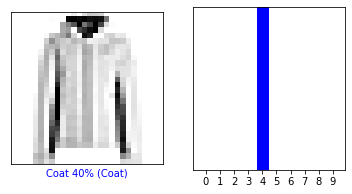

In [50]:
i=6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()


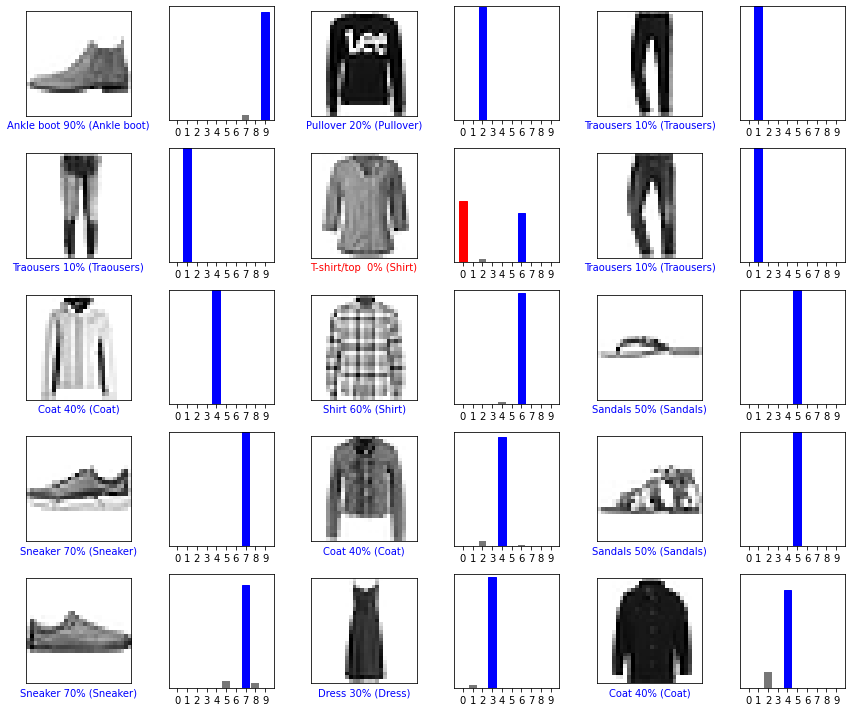

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_images(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)

plt.tight_layout()
plt.show()
#szare słupki prezentują prawdopodobieństwa, które nie wpłynęły na wybór

In [52]:
#użycie wyszkolonego modelu
img = test_images[1]
print(img.shape)

(28, 28)


In [53]:
img = (np.expand_dims(img,0)) #przekaże obraz na zerowej pozycji
print(img.shape)

(1, 28, 28)


In [54]:
predictions_single = probability_model.predict(img)
print(predictions_single) 

[[5.1729882e-04 1.1294410e-10 9.9534827e-01 2.7060580e-09 3.1118295e-03
  1.2637465e-14 1.0225252e-03 2.2963079e-13 8.7892404e-10 5.1251662e-13]]


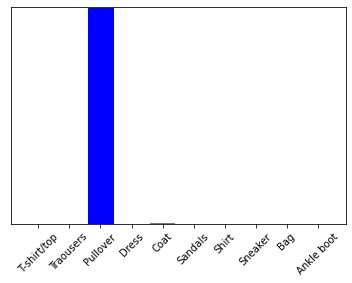

In [58]:
plot_value_array(1,predictions_single[0],test_labels) 
_ = plt.xticks(range(10),class_names, rotation=45)
plt.show()